# Machine Learning with PyTorch and Scikit-Learn  
# -- Code Examples

## Package version checks

Add folder to path in order to load from the check_packages.py script:

In [1]:
import sys
sys.path.insert(0, '..')

Check recommended package versions:

In [2]:
from python_environment_check import check_packages


d = {
    'torch': '1.8.0',
}
check_packages(d)

/home/arvid/GitHub/sagemath-examples/ch15/../python_environment_check.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(sys.version) < LooseVersion('3.8'):


[OK] Your Python version is 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
[OK] torch 2.0.1+cu117


/home/arvid/GitHub/sagemath-examples/ch15/../python_environment_check.py:39: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  actual_ver, suggested_ver = LooseVersion(actual_ver), LooseVersion(suggested_ver)


In [3]:
import torch

# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(f'torch.cuda.is_available(): {torch.cuda.is_available()}')
    print(f'torch.cuda.device_count(): {torch.cuda.device_count()}')
    print(f'torch.cuda.current_device(): {torch.cuda.current_device()}')
    print(f'torch.cuda.get_device_name(0): {torch.cuda.get_device_name(0)}')
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')
    !nvidia-smi

Using device: cuda

torch.cuda.is_available(): True
torch.cuda.device_count(): 1
torch.cuda.current_device(): 0
torch.cuda.get_device_name(0): NVIDIA RTX A5000 Laptop GPU
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB
Tue Aug 22 00:04:43 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.86.10              Driver Version: 535.86.10    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A5000 Laptop GPU    On  | 00000000:01:00.0 Off |                  N/A |
| N/A   57C    P8          

# Chapter 15: Modeling Sequential Data Using Recurrent Neural Networks (Part 1/3)

**Outline**

- [Introducing sequential data](#Introducing-sequential-data)
  - [Modeling sequential data -- order matters](#Modeling-sequential-data----order-matters)
  - [Sequential data versus time series data](#Sequential-data-versus-time-series-data)
  - [Representing sequences](#Representing-sequences)
  - [The different categories of sequence modeling](#The-different-categories-of-sequence-modeling)
- [RNNs for modeling sequences](#RNNs-for-modeling-sequences)
  - [Understanding the dataflow in RNNs](#Understanding-the-dataflow-in-RNNs)
  - [Computing activations in an RNN](#Computing-activations-in-an-RNN)
  - [Hidden recurrence versus output recurrence](#Hidden-recurrence-versus-output-recurrence)
  - [The challenges of learning long-range interactions](#The-challenges-of-learning-long-range-interactions)
  - [Long short-term memory cells](#Long-short-term-memory-cells)

In [4]:
from IPython.display import Image
%matplotlib inline

# Introducing sequential data

## Modeling sequential data⁠—order matters

## Representing sequences



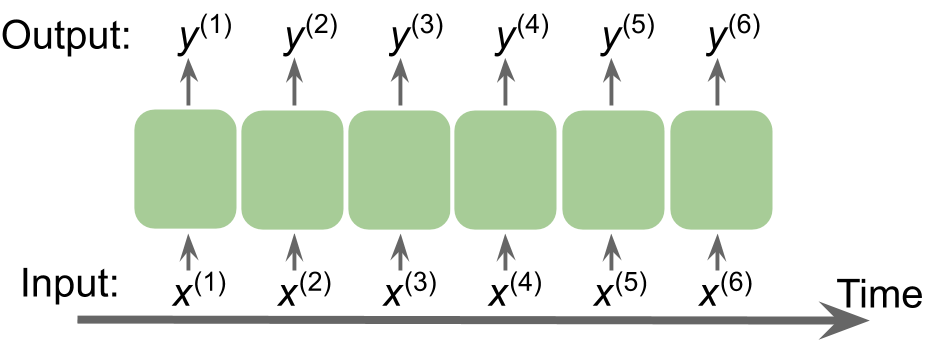

In [5]:
Image(filename='figures/15_01.png', width=500)

## The different categories of sequence modeling

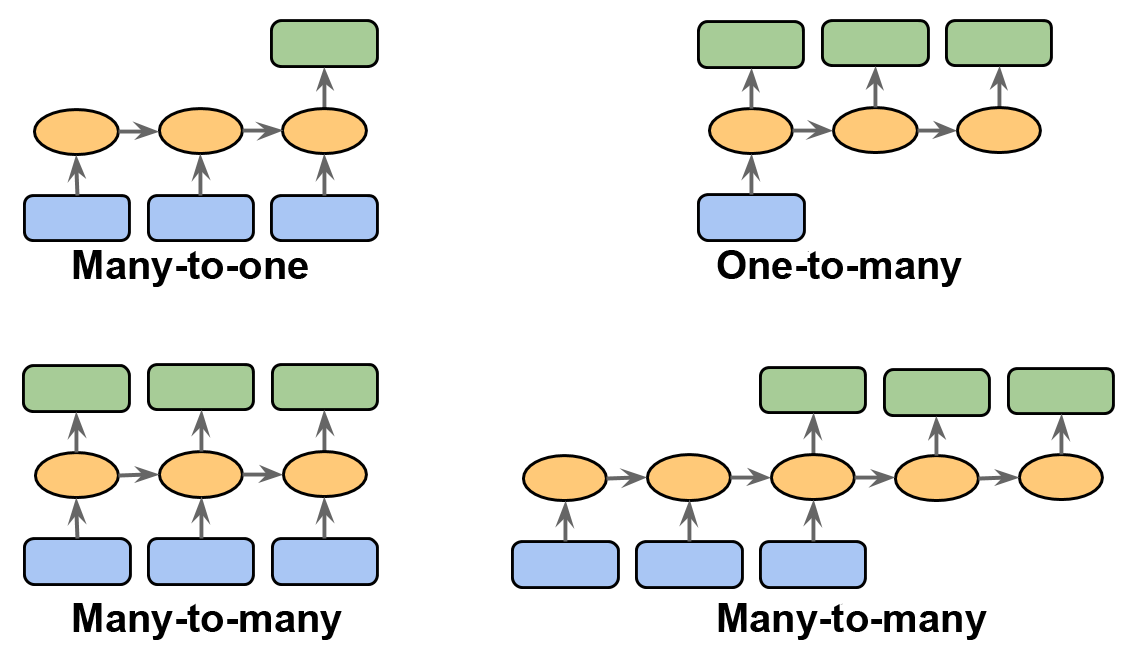

In [6]:
Image(filename='figures/15_02.png', width=500)

# RNNs for modeling sequences

## Understanding the RNN looping mechanism


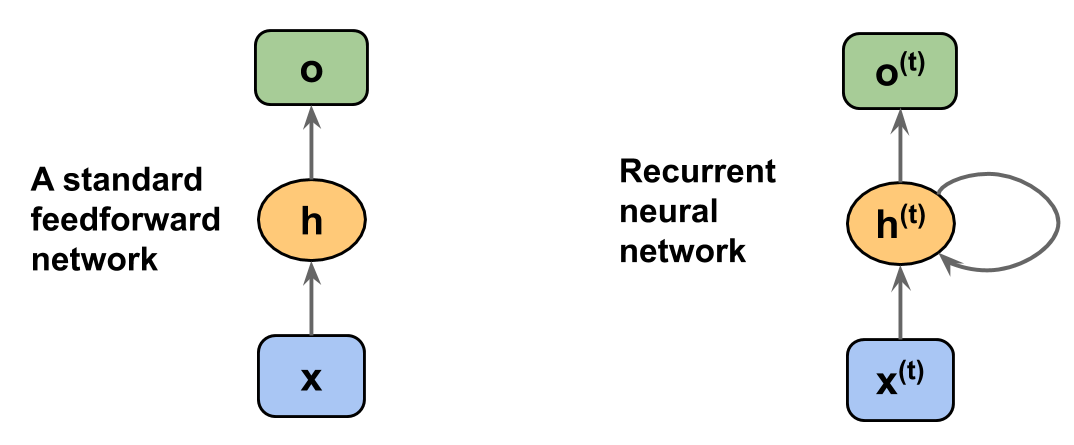

In [7]:
Image(filename='figures/15_03.png', width=500)

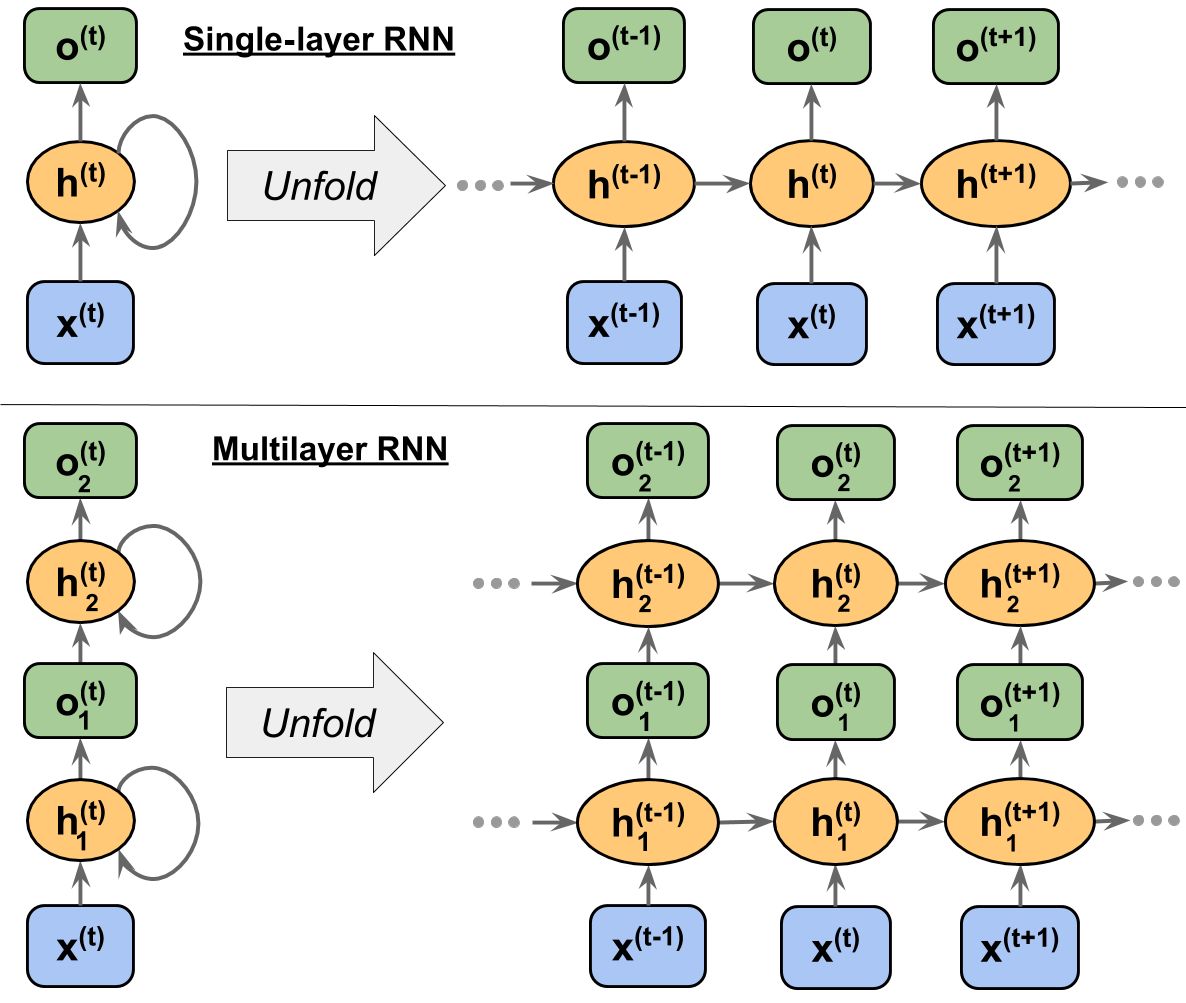

In [8]:
Image(filename='figures/15_04.png', width=500)

## Computing activations in an RNN


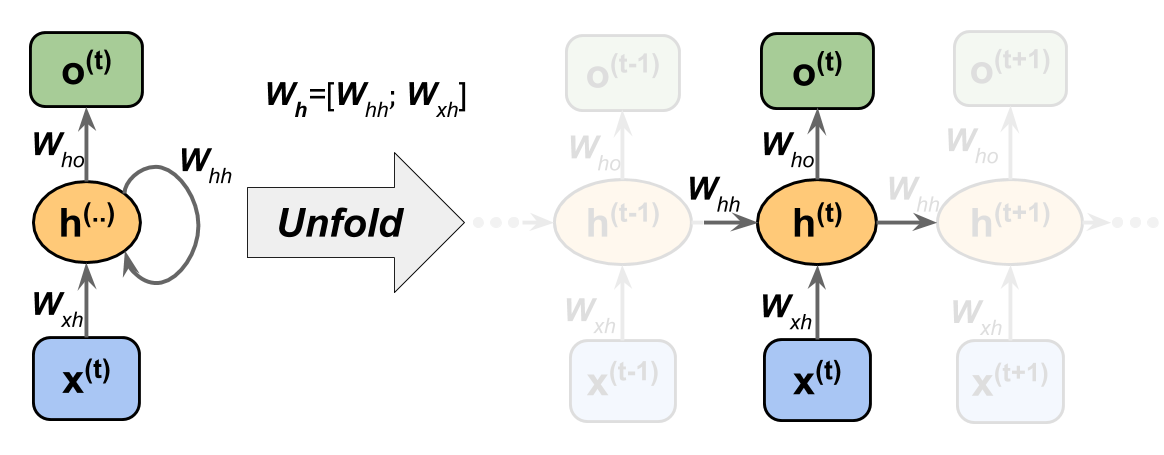

In [9]:
Image(filename='figures/15_05.png', width=500)

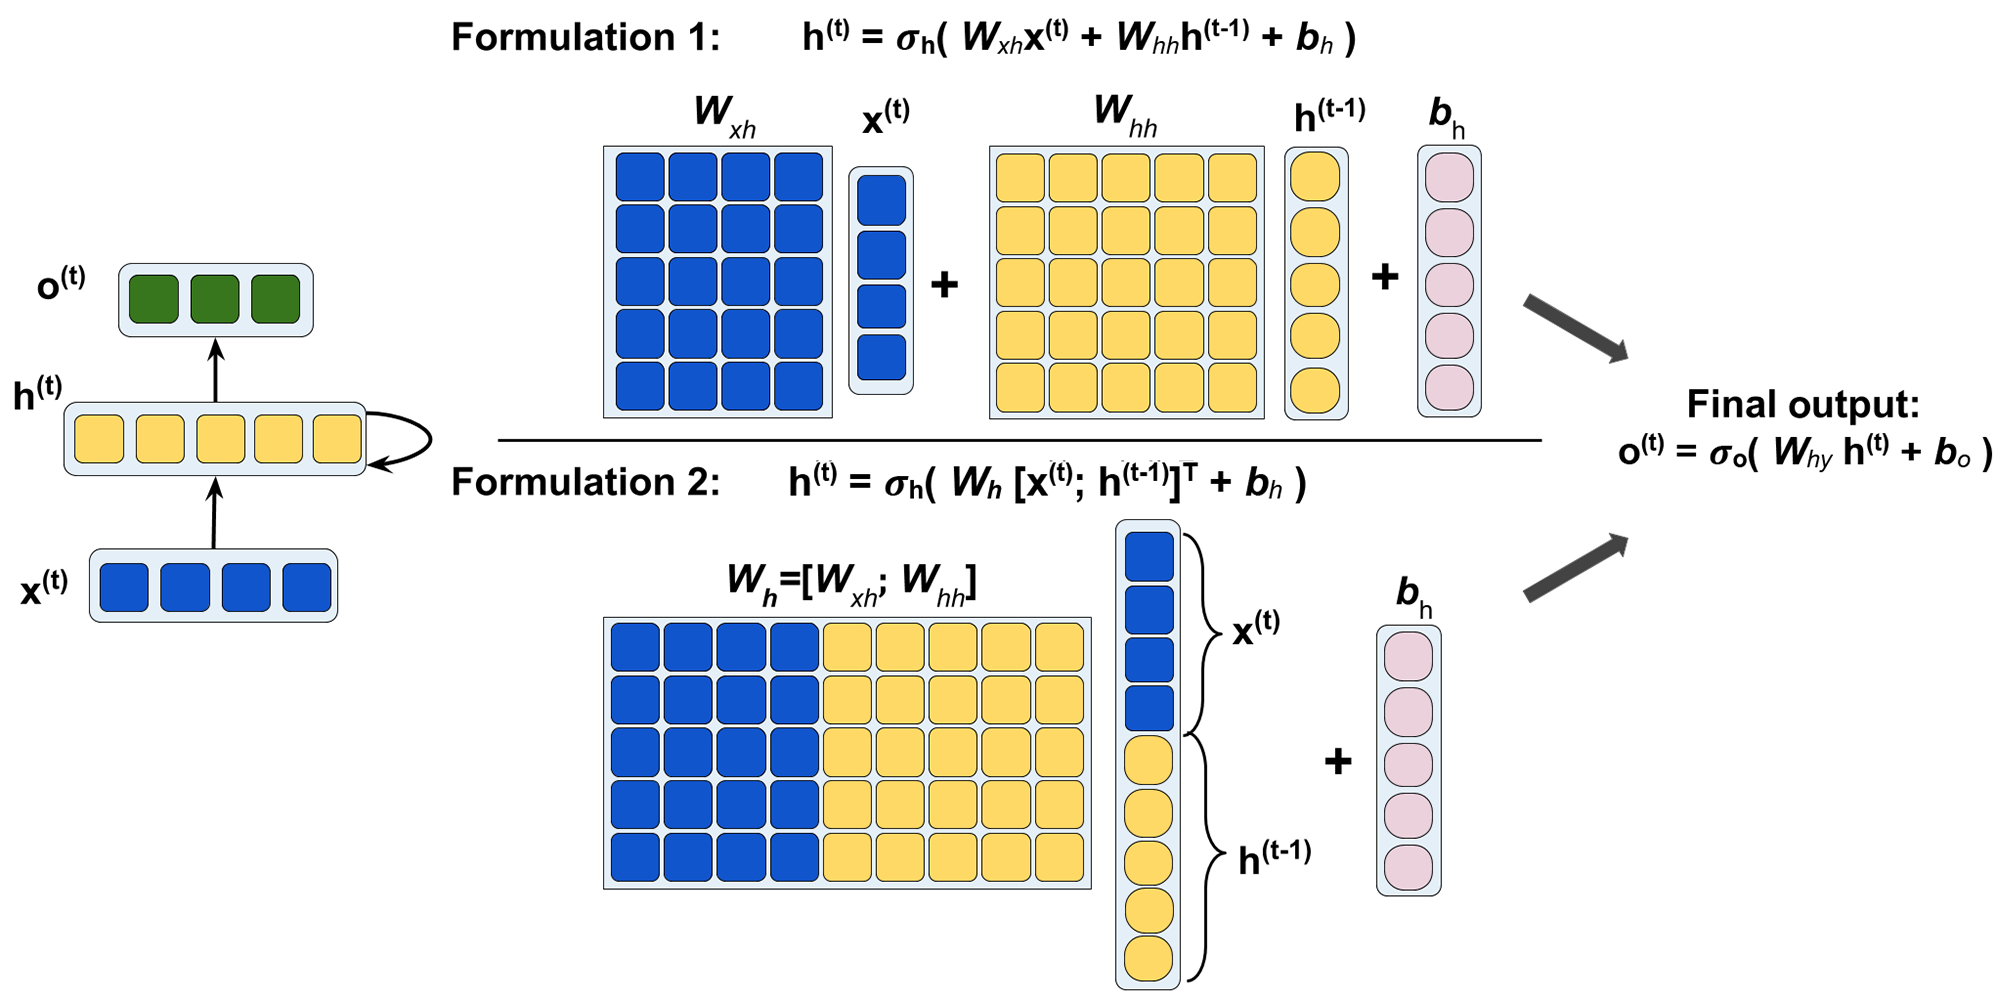

In [10]:
Image(filename='figures/15_06.png', width=700)

## Hidden-recurrence vs. output-recurrence

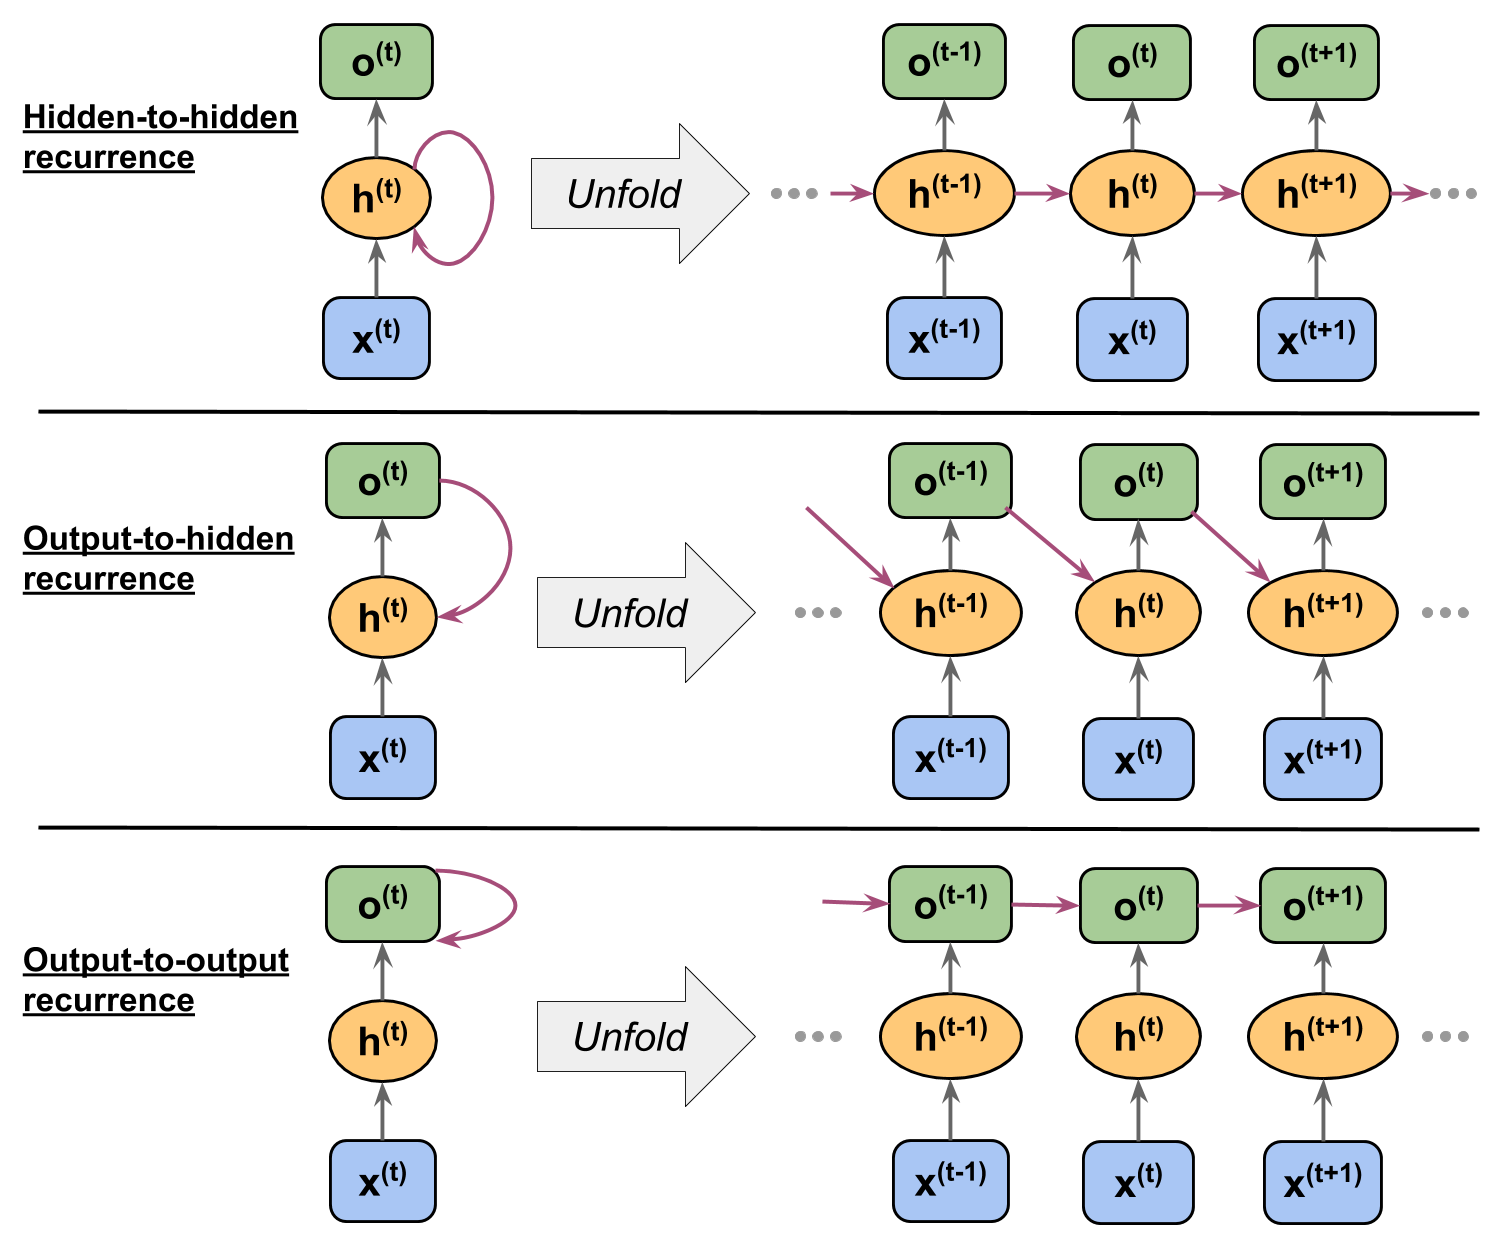

In [11]:
Image(filename='figures/15_07.png', width=500)

In [12]:
import torch
import torch.nn as nn

torch.manual_seed(1)

rnn_layer = nn.RNN(input_size=5, hidden_size=2, num_layers=1, batch_first=True) 

w_xh = rnn_layer.weight_ih_l0
w_hh = rnn_layer.weight_hh_l0
b_xh = rnn_layer.bias_ih_l0
b_hh = rnn_layer.bias_hh_l0

print('W_xh shape:', w_xh.shape)
print('W_hh shape:', w_hh.shape)
print('b_xh shape:', b_xh.shape)
print('b_hh shape:', b_hh.shape)

W_xh shape: torch.Size([2, 5])
W_hh shape: torch.Size([2, 2])
b_xh shape: torch.Size([2])
b_hh shape: torch.Size([2])


In [13]:
x_seq = torch.tensor([[1.0]*5, [2.0]*5, [3.0]*5]).float()

## output of the simple RNN:
output, hn = rnn_layer(torch.reshape(x_seq, (1, 3, 5)))

## manually computing the output:
out_man = []
for t in range(3):
    xt = torch.reshape(x_seq[t], (1, 5))
    print(f'Time step {t} =>')
    print('   Input           :', xt.numpy())
    
    ht = torch.matmul(xt, torch.transpose(w_xh, 0, 1)) + b_xh    
    print('   Hidden          :', ht.detach().numpy())
    
    if t>0:
        prev_h = out_man[t-1]
    else:
        prev_h = torch.zeros((ht.shape))

    ot = ht + torch.matmul(prev_h, torch.transpose(w_hh, 0, 1)) + b_hh
    ot = torch.tanh(ot)
    out_man.append(ot)
    print('   Output (manual) :', ot.detach().numpy())
    print('   RNN output      :', output[:, t].detach().numpy())
    print()

RuntimeError: Could not infer dtype of sage.rings.real_mpfr.RealLiteral

## The challenges of learning long-range interactions


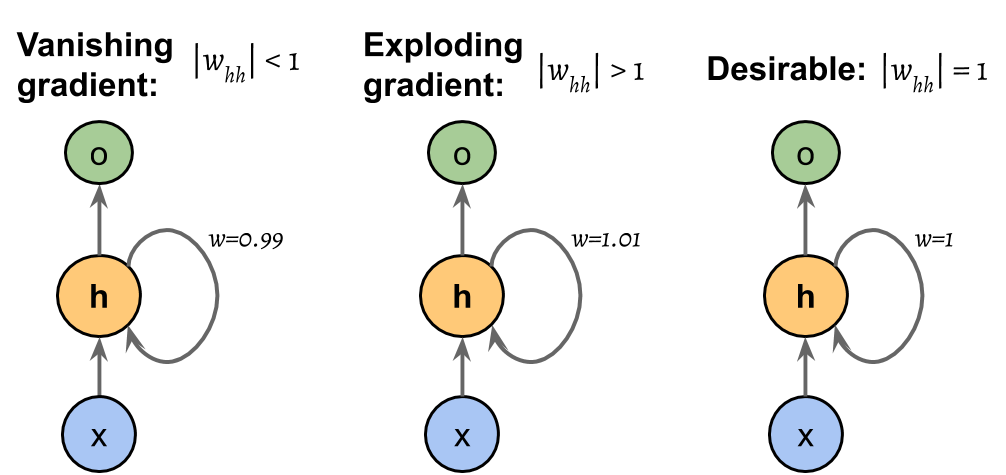

In [14]:
Image(filename='figures/15_08.png', width=500)


## Long Short-Term Memory cells 

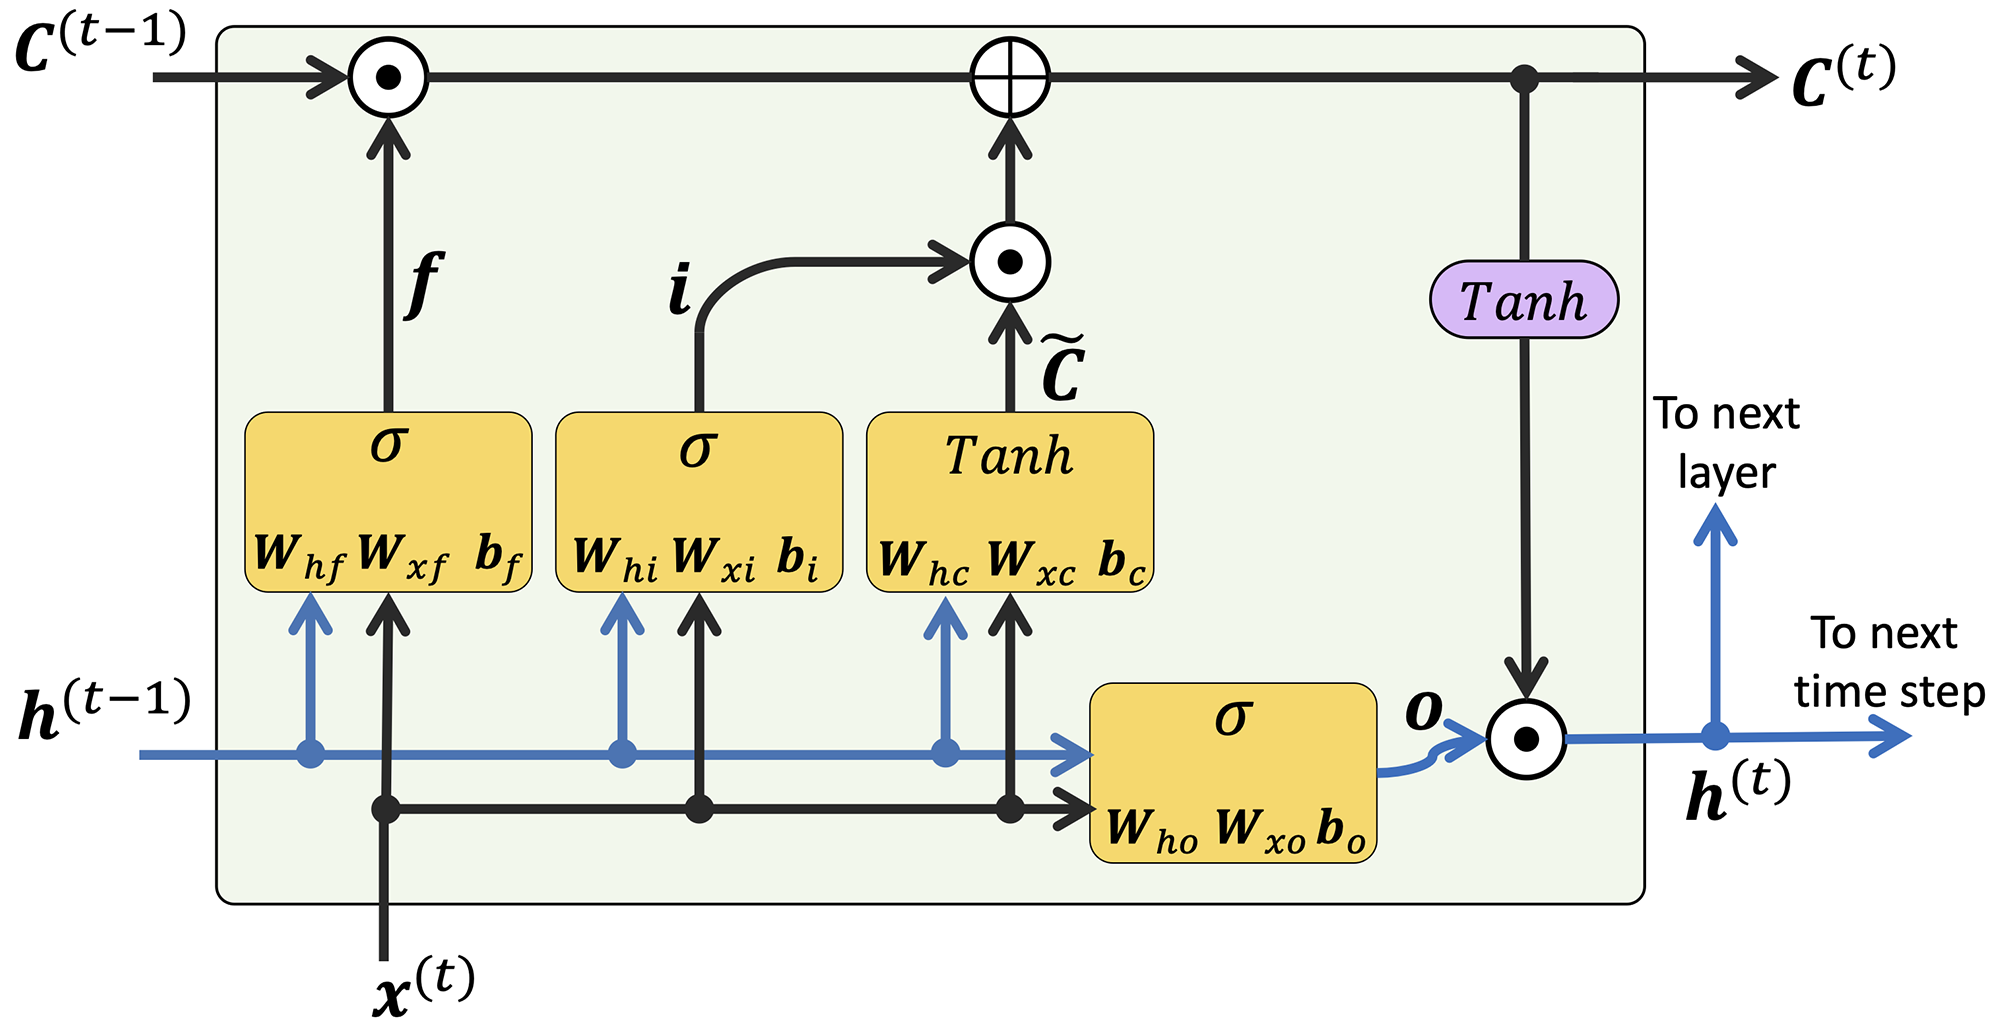

In [15]:
Image(filename='figures/15_09.png', width=500)

<br>
<br>

---



Readers may ignore the next cell.


In [16]:
! python ../.convert_notebook_to_script.py --input ch15_part1.ipynb --output ch15_part1.py

python: can't open file '/home/arvid/GitHub/sagemath-examples/ch15/../.convert_notebook_to_script.py': [Errno 2] No such file or directory
